In [1]:
import numpy as np               
import pandas as pd              

import matplotlib.pyplot as plt  


%matplotlib inline    

In [2]:
census = pd.read_csv("Coursework_clssf1.csv")

In [3]:
census.head()

Region  Residence Type  Family Composition  Population Base  Sex  Age  \
0       3               0                   3                2    0    5   
1       3               0                   0                2    0    0   
2       3               0                   3                2    1    6   
3       3               0                   5                2    0    5   
4       3               0                   3                2    1    0   

   Marital Status  Student  Country of Birth  Health  Ethnic Group  Religion  \
0               1        0                 2       2             5         1   
1               3        0                 2       2             5         6   
2               1        0                 2       5             5         1   
3               0        0                 2       1             5         1   
4               3        1                 2       5             5         6   

   Economic Activity  Occupation  Industry  Hours worked per week  \
0                  7           6         2                      2   
1                  9           5         0                      2   
2                  7           6         2                      2   
3                  7           3         5                      2   
4                  9           5         0                      2   

   No of hours  Approximated Social Grade  Indutry  
0           60                          3        6  
1           60                          4        7  
2           60                          1        6  
3           60                          3        0  
4           60                          4        7

In [4]:
census.keys()

Index(['Region', 'Residence Type', 'Family Composition', 'Population Base',
       'Sex', 'Age', 'Marital Status', 'Student', 'Country of Birth', 'Health',
       'Ethnic Group', 'Religion', 'Economic Activity', 'Occupation',
       'Industry', 'Hours worked per week', 'No of hours',
       'Approximated Social Grade', 'Indutry'],
      dtype='object')

In [5]:
column_arrange = ['Region', 'Residence Type', 'Family Composition', 'Population Base',
       'Sex', 'Age', 'Marital Status', 'Student', 'Country of Birth', 'Health',
       'Ethnic Group', 'Religion', 'Economic Activity', 'Occupation',
       'Hours worked per week', 'Indutry','Approximated Social Grade','No of hours'
       ]
census = census[column_arrange]

In [6]:
census.head()

Region  Residence Type  Family Composition  Population Base  Sex  Age  \
0       3               0                   3                2    0    5   
1       3               0                   0                2    0    0   
2       3               0                   3                2    1    6   
3       3               0                   5                2    0    5   
4       3               0                   3                2    1    0   

   Marital Status  Student  Country of Birth  Health  Ethnic Group  Religion  \
0               1        0                 2       2             5         1   
1               3        0                 2       2             5         6   
2               1        0                 2       5             5         1   
3               0        0                 2       1             5         1   
4               3        1                 2       5             5         6   

   Economic Activity  Occupation  Hours worked per week  Indutry  \
0                  7           6                      2        6   
1                  9           5                      2        7   
2                  7           6                      2        6   
3                  7           3                      2        0   
4                  9           5                      2        7   

   Approximated Social Grade  No of hours  
0                          3           60  
1                          4           60  
2                          1           60  
3                          3           60  
4                          4           60

In [8]:
X = census.iloc[:,:-1].values    
y = census.iloc[:,-1].values 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)

from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')

print("R2 score:", r2_score(y_test, y_pred))

adj_r2 = 1 - (1-r2_score(y_test, y_pred))*(len(y_pred)-1)/(len(y_pred)-X_test.shape[1]-1)
print("Adjusted R2 score:", adj_r2)

Mean Absolute Error: 5.814191858521707
Mean Squared Error: 73.84988479513365
Root Mean Squared Error: 8.593595568511102 

R2 score: 0.706722184482103
Adjusted R2 score: 0.7066871765626566


In [11]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train,y_train)
regr_2.fit(X_train,y_train)

y1_pred = regr_1.predict(X_test)
y2_pred = regr_2.predict(X_test)

In [12]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y2_pred)), '\n')

print("R2 score:", r2_score(y_test, y2_pred))

adj_r2 = 1 - (1-r2_score(y_test, y2_pred))*(len(y2_pred)-1)/(len(y2_pred)-X_test.shape[1]-1)
print("Adjusted R2 score:", adj_r2)

Mean Absolute Error: 1.9249783912549265
Mean Squared Error: 10.650796990491521
Root Mean Squared Error: 3.263555881318952 

R2 score: 0.957702811811268
Adjusted R2 score: 0.9576977628901476


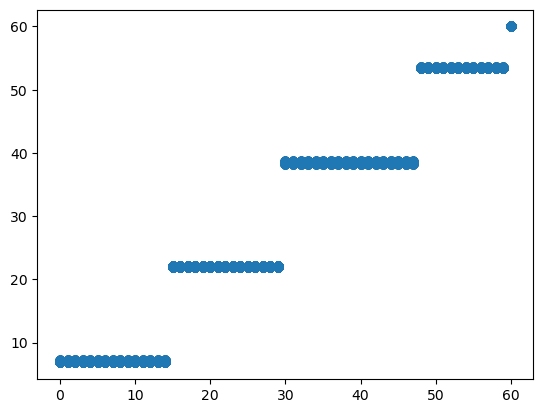

In [15]:
plt.scatter(y_test, y2_pred)
plt.show()